### 사전준비

In [1]:
# 기본 패키지
import numpy as np 
import pandas as pd 
import scipy as sp 

import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 머신러닝 패키지 import
import statsmodels.api as sm 
import sklearn as sk

In [3]:
# 한글 설정, 마이너스 표시 가능하게 하기
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font = 'Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 패션MNIST 데이터

### 데이터 로드

In [4]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [5]:
(train_input, train_target), (test_input, test_target) = load_data()

#### 정규화

#### ReLu 활성화 함수 / Flattern 층(2차원 -> 1차원)

In [6]:
(train_input, train_target), (test_input, test_target) = load_data()

In [7]:
train_scaled = train_input / 255.0 # 0~1 사이 실수값 변경

In [8]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [9]:
train_scaled.shape

(48000, 28, 28)

In [10]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


#### 모델 생성 함수

In [22]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='model_fn_MakeModel')
    model.add(keras.layers.Flatten(input_shape=(28,28))) # 2차원 입력값을 1차원으로 변환
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))

    if a_layer:
        model.add(a_layer)
        
    model.add(keras.layers.Dense(10, activation='softmax', name='output'))

    return model

In [16]:
model = model_fn(keras.layers.Dense(100,activation='relu', name='hidden2'))
model.summary()

Model: "model_fn MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### 손실곡선, 정확도

In [23]:
model = model_fn()
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 2s - loss: 0.5321 - accuracy: 0.8129 - 2s/epoch - 2ms/step
Epoch 2/5
1500/1500 - 2s - loss: 0.3929 - accuracy: 0.8588 - 2s/epoch - 1ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.3565 - accuracy: 0.8725 - 2s/epoch - 1ms/step
Epoch 4/5
1500/1500 - 2s - loss: 0.3342 - accuracy: 0.8815 - 2s/epoch - 1ms/step
Epoch 5/5
1500/1500 - 2s - loss: 0.3182 - accuracy: 0.8862 - 2s/epoch - 2ms/step


In [25]:
history.history

{'loss': [0.5320735573768616,
  0.3928990960121155,
  0.3564746379852295,
  0.3341692388057709,
  0.31815603375434875],
 'accuracy': [0.8128958344459534,
  0.8588125109672546,
  0.8725000023841858,
  0.8815000057220459,
  0.8861666917800903]}

#### 손실곡선 차트

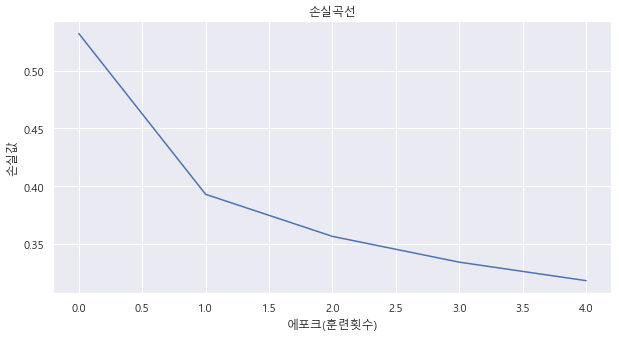

In [26]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('손실곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실값')
plt.show()

#### 정확도 차트

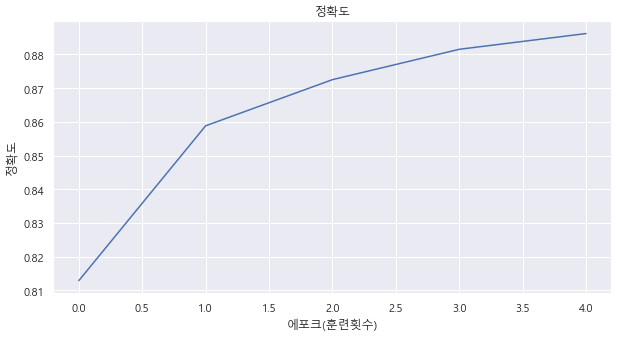

In [29]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.title('정확도')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('정확도')
plt.show()

#### 에포크를 20번으로 늘림 

In [30]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5353 - accuracy: 0.8114
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3937 - accuracy: 0.8589
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3564 - accuracy: 0.8712
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3331 - accuracy: 0.8791
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3205 - accuracy: 0.8865
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3098 - accuracy: 0.8900
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3004 - accuracy: 0.8939
Epoch 8/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2924 - accuracy: 0.8975
Epoch 9/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2841 - accuracy: 0.8996
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.278

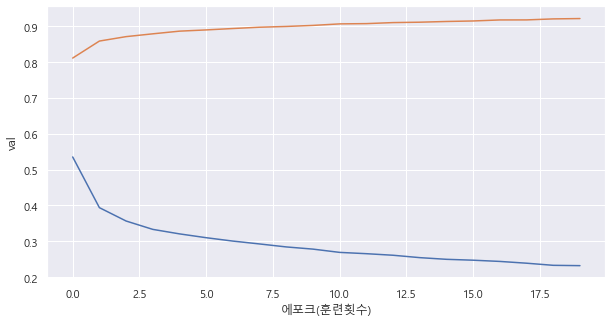

In [32]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
# plt.title('정확도')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('val')
plt.show()

#### 검증손실

훈련세트 훈련 -> 정확도 92%

In [33]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))


Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5320 - accuracy: 0.8113 - val_loss: 0.4199 - val_accuracy: 0.8497
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3914 - accuracy: 0.8607 - val_loss: 0.3856 - val_accuracy: 0.8657
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3543 - accuracy: 0.8711 - val_loss: 0.3773 - val_accuracy: 0.8742
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3340 - accuracy: 0.8811 - val_loss: 0.3607 - val_accuracy: 0.8742
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3198 - accuracy: 0.8851 - val_loss: 0.4084 - val_accuracy: 0.8606
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3105 - accuracy: 0.8885 - val_loss: 0.3752 - val_accuracy: 0.8766
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3004 - accuracy: 0.8919 - val_loss: 0.3811 - val_accuracy:

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련세트/검증세트 비교

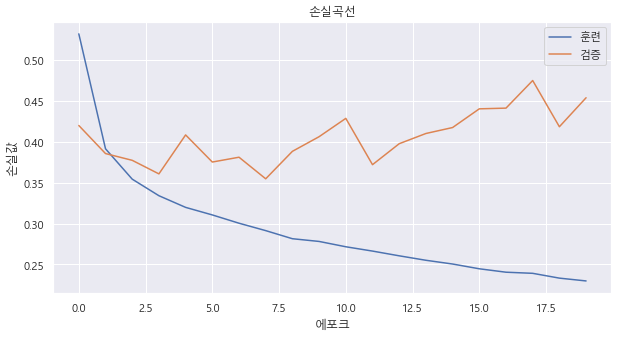

In [36]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

#### 드롭아웃

In [37]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5867 - accuracy: 0.7946 - val_loss: 0.4567 - val_accuracy: 0.8388
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4493 - accuracy: 0.8408 - val_loss: 0.4150 - val_accuracy: 0.8512
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4228 - accuracy: 0.8535 - val_loss: 0.4031 - val_accuracy: 0.8522
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4062 - accuracy: 0.8600 - val_loss: 0.3928 - val_accuracy: 0.8627
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3984 - accuracy: 0.8655 - val_loss: 0.3746 - val_accuracy: 0.8749
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3948 - accuracy: 0.8662 - val_loss: 0.3854 - val_accuracy: 0.8769
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3890 - accuracy: 0.8701 - val_loss: 0.3940 - val_accuracy:

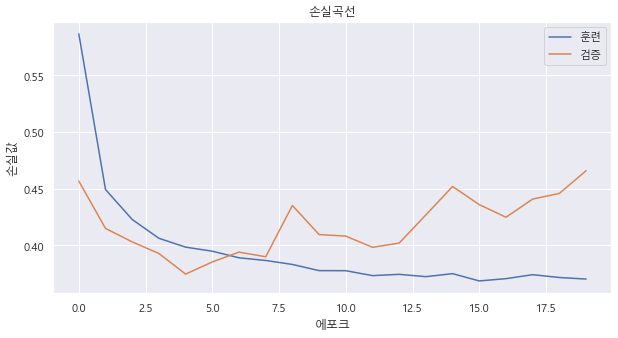

In [39]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [40]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy',optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3672 - accuracy: 0.8755 - val_loss: 0.3944 - val_accuracy: 0.8753
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3436 - accuracy: 0.8796 - val_loss: 0.4003 - val_accuracy: 0.8737
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3349 - accuracy: 0.8798 - val_loss: 0.3774 - val_accuracy: 0.8821
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3273 - accuracy: 0.8802 - val_loss: 0.3758 - val_accuracy: 0.8765
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3176 - accuracy: 0.8830 - val_loss: 0.3668 - val_accuracy: 0.8776
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3103 - accuracy: 0.8852 - val_loss: 0.3602 - val_accuracy: 0.8827
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3051 - accuracy: 0.8870 - val_loss: 0.3669 - val_accuracy:

#### NPU(Neural Processing Unit) : 신경망 처리 장치. 연산을 고속으로 처리하기 위하여 개발한 장치
#### TPU(Tensor Processing Unit) : 구글에서 딥러닝을 위해 만든 NPU

#### 모델 저장/로드

In [42]:
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [43]:
# 훈련된 가중치만 저장
model.save_weights('./data/model_weights.h5')

In [44]:
# 훈련된 전체데이터 저장
model.save('./data/model.h5')

#### 가중치 모델 로드

In [45]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model_weights.h5')

In [46]:
# 가중치를 불러왔기 때문에 evaluate 안됨
model.evaluate(val_scaled, val_target)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

#### 전체모델 로드

In [47]:
model = keras.models.load_model('./data/model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3569 - accuracy: 0.8878


[0.3569483757019043, 0.8878333568572998]

가중치만 저장하면 모델 기능 제약있음. 모델 전체 데이터 저장하면 모든 기능 수행 가능

In [48]:
model.predict(val_scaled)

375/375 [==============================] - 0s 1ms/step


array([[4.28617261e-31, 0.00000000e+00, 2.75525678e-32, ...,
        1.06117372e-23, 1.00000000e+00, 1.87069901e-30],
       [2.75240165e-23, 6.30411131e-37, 9.60906597e-22, ...,
        1.38982610e-21, 1.00000000e+00, 3.51963024e-19],
       [6.96089476e-27, 1.80176185e-26, 2.12774168e-37, ...,
        9.99979734e-01, 2.85550688e-17, 4.13478540e-09],
       ...,
       [5.79781177e-15, 4.37893952e-30, 1.68344609e-16, ...,
        3.69539299e-15, 1.00000000e+00, 5.94014177e-14],
       [6.21012024e-21, 0.00000000e+00, 2.17532222e-28, ...,
        1.88059124e-26, 1.00000000e+00, 1.19472645e-23],
       [3.67835224e-01, 5.81769280e-16, 7.20899288e-06, ...,
        6.42342446e-03, 6.13842532e-10, 5.98757029e-01]], dtype=float32)

In [49]:
# 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 1ms/step


0.8878333333333334

In [50]:
val_labels.shape

(12000,)

In [51]:
val_labels

array([8, 8, 7, ..., 8, 8, 9], dtype=int64)

#### 콜백 Callback

In [52]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy',optimizer='adam')
# 베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5925 - accuracy: 0.7929 - val_loss: 0.4299 - val_accuracy: 0.8440
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4410 - accuracy: 0.8408 - val_loss: 0.3861 - val_accuracy: 0.8615
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4039 - accuracy: 0.8538 - val_loss: 0.3991 - val_accuracy: 0.8575
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3824 - accuracy: 0.8600 - val_loss: 0.3493 - val_accuracy: 0.8728
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3639 - accuracy: 0.8650 - val_loss: 0.3451 - val_accuracy: 0.8752
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3526 - accuracy: 0.8710 - val_loss: 0.3414 - val_accuracy: 0.8738
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3431 - accuracy: 0.8730 - val_loss: 0.3436 - val_accuracy:

In [53]:
# 체크포인트 확인
model = keras.models.load_model('./data/best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3226 - accuracy: 0.8889


[0.3226136565208435, 0.8889166712760925]

#### 조기종료

In [64]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy',optimizer='adam')
# 베스트 모델을 저장할 콜백
# save_best_only=True 가장 좋은 모델 저장됨
# verbose = 1는 각 에포크 마다 결과값 출력해줌
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model2.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1495/1500 [============================>.] - ETA: 0s - loss: 0.5968 - accuracy: 0.7900
Epoch 1: val_loss improved from inf to 0.42427, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5967 - accuracy: 0.7902 - val_loss: 0.4243 - val_accuracy: 0.8473
Epoch 2/20
1477/1500 [============================>.] - ETA: 0s - loss: 0.4418 - accuracy: 0.8428
Epoch 2: val_loss improved from 0.42427 to 0.40370, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4408 - accuracy: 0.8432 - val_loss: 0.4037 - val_accuracy: 0.8507
Epoch 3/20
1476/1500 [============================>.] - ETA: 0s - loss: 0.4012 - accuracy: 0.8541
Epoch 3: val_loss improved from 0.40370 to 0.37623, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4010 - accuracy: 0.8542 - val_loss: 0.3762 - val_accuracy: 0.8626
Epoch 4/20
1475/1500 [===================

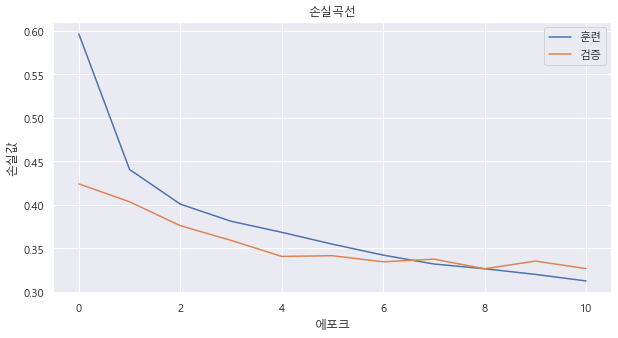

In [65]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [66]:
# 어느 에포크에서 조기종료했는지 확인
early_stopping_cb.stopped_epoch # 10번째에서 멈춤(드랍아웃)

10

In [67]:
model.evaluate(val_scaled,val_target) # 9번째 에포크 값이 평가됨

375/375 [==============================] - 0s 1ms/step - loss: 0.3267 - accuracy: 0.8812


[0.3266941010951996, 0.8811666369438171]

In [61]:
# 최종값 저장
model.save('./data/best_model_epoch12.h5')

### 조기종료된 모델 저장값 / 체크포인트로 저장된 모델 저장값 비교

In [68]:
model_cp = keras.models.load_model('./data/best_model2.h5')
model_cp.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3267 - accuracy: 0.8812


[0.3266941010951996, 0.8811666369438171]

In [63]:
model_12 = keras.models.load_model('./data/best_model_epoch12.h5')
model_12.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3237 - accuracy: 0.8861


[0.3236612379550934, 0.8860833048820496]

In [69]:
# 예측결과
val_labels[:10]

array([8, 8, 7, 4, 8, 4, 1, 0, 4, 5], dtype=int64)